# Proyek Analisis Data: [E-Commerce Public Dataset ]
- **Nama:** [Rahma Almira]
- **Email:** [rahmaalmira241@gmail.com]
- **ID Dicoding:** [rahma_almira_yDjO]

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling laku di pasaran dan paling kurang laku di pasaran?
- Produk apa yang memiliki review score (rating) paling baik dan paling buruk?

## Import Semua Packages/Library yang Digunakan

In [1]:
#import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("/content/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order = pd.read_csv("/content/orders_dataset.csv")
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
item = pd.read_csv("/content/order_items_dataset.csv")
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
payment = pd.read_csv("/content/order_payments_dataset.csv")
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
product = pd.read_csv("/content/products_dataset.csv")
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
category_product = pd.read_csv("/content/product_category_name_translation.csv")
category_product.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
seller = pd.read_csv("/content/sellers_dataset.csv")
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
geo = pd.read_csv("/content/geolocation_dataset.csv")
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
review = pd.read_csv("/content/order_reviews_dataset.csv")
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

In [11]:
customers.isnull().sum()


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
customers.duplicated().sum()

0

Pada data customers tidak memiliki missing value dan tidak terdapat duplikasi data.

In [13]:
order.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [14]:
order.duplicated().sum()

0

Pada data order terdapat missing value pada variabel **order_approved_at** sebanyak 160 data, pada varaibel **order_delivered_carrier_date** sebanyak 1783 data, pada variabel **order_delivered_customer_date** sebanyak 2965 data.
Pada data order tidak terdapat duplikasi data.

In [15]:
item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
item.duplicated().sum()

0

Data item tidak memiliki missing value dan tidak terdapat duplikasi data.

In [17]:
payment.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [18]:
payment.duplicated().sum()

0

Data payment tidak memiliki missing value dan tidak terdapat duplikasi data.

In [19]:
product.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [20]:
product.duplicated().sum()

0

Terdapat 610 missing value pada product_category_name, product_name_lenght, product_description_length, dan product_photos_qty. Selain itu juga terdapat 2 missing value pada weigght, length, height, dan juga width product. Tidak terdapat duplikasi pada data produk.  

In [21]:
category_product.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [22]:
seller.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [23]:
seller.duplicated().sum()

0

Data seller tidak memiliki missing value dan tidak terdapat duplikasi data.

In [24]:
review.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [25]:
review.duplicated().sum()

0

Terdapat 87656 missing value pada variabel **review_comment_title** dan 58247 missing value pada data **review_comment_message**. Tidak terdapat duplikasi data pada data review.

**Insight:**
- Pada data cutomers, item, payment, dan seller tidak terdapat missing value dan duplikasi data.
- Pada data order terdapat missing value pada variabel **order_approved_at** sebanyak 160 data, pada varaibel **order_delivered_carrier_date** sebanyak 1783 data, pada variabel **order_delivered_customer_date** sebanyak 2965 data. Pada data order tidak terdapat duplikasi data.
- Terdapat 610 missing value pada **product_category_name, product_name_lenght, product_description_length, dan product_photos_qty**. Selain itu juga terdapat 2 missing value pada **weigght, length, height, dan juga width product**. Tidak terdapat duplikasi pada data produk.
- Terdapat 87656 missing value pada variabel **review_comment_title** dan 58247 missing value pada data **review_comment_message**. Tidak terdapat duplikasi data pada data review.



### Cleaning Data

Tidak dilakukan cleaning data karena data pokok tidak bermasalah

## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Dari rangkuman parameter diatas dapat diperoleh infromasi bahwa terdapat 99441 data customer yang berasal dari 4119 kota yang berbeda dan 27 negara berbeda.

In [27]:
order.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
order.groupby("order_status")["order_id"].count()

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


Dari rangkuman parameter diperoleh informasi bahwa terdapat 99441 order dengan 8 customer status (approved, canceled, created, delivered, invoiced, processing, shipped, dan unavailable). Terdapat 2 pesanan dengan status approved, 625 berstatus canceled, 5 berstatus created, 96478 berstatus delivered, 314 berstatus invoiced, 301 berstatus processing, 1107 berstatus shipped, dan 609 berstatus unavailable.

In [29]:
item.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Dari rangkuman parameter diatas diperoleh informasi bahwa terdapat 112650 data item dengan harga tertinggi yaitu 6735 dan harga terendah adalah 0,85.

In [30]:
payment.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Dari rangkuman parameter diatas diperoleh informasi bahwa terdapat 103886 data payment dengan pembayaran tertinggi yaitu 13664,08 dan pembayaran paling sedikit adalah 0, serta rata-rata jumlah pembayaran sebanyak 154,100.

In [31]:
payment.groupby(by="payment_type").agg({
    "order_id":"count",
    "payment_value":"sum"})

,order_id,payment_value
payment_type,,
boleto,19784,2869361.27
credit_card,76795,12542084.19
debit_card,1529,217989.79
not_defined,3,0.00
voucher,5775,379436.87


Pada tabel pivot diatas diperoleh informasi bahwa terdapat 5 tipe pembayaran yang dilakukan. 19784 pembayaran dilakukan melalui boleto dengan total jumlah pembayaran sebesar 2869361,31. 76795 pembayaran dilakukan melalui credit card dengan total jumlah pembayaran sejumlah 12542084,19. 1529 pembayaran dilakukan melalui debit card dengan jumlah pembayaran sebesar 217989,79. 3 pembayaran tidak terdefinisi. Dan 5775 pembayaran dilakukan menggunakan voucher dengan total jumlah pembayaran sebesar 379436,87.

In [32]:
product.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Dari ringkasan parameter diatas diperoleh informasi bahwa terdapat 32951 data produk dengan berat produk tertinggi adalah 40425 gram dan berat terendah adalah 0 gram.

In [33]:
category_product.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Terdapat 71 nama kategori produk

In [34]:
seller.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [35]:
seller.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(1)

,seller_id
seller_city,
sao paulo,694


In [36]:
seller.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(1)

,seller_id
seller_state,
SP,1849


Terdapat 3095 data seller yang tersebar di 611 kota dan 23 negara. Kota dengan jumlah seller paling banyak adalah kota Sao Paulo dengan jumlah seller sebanyak 694. Negara dengan jumlah seller terbanyak adalah SP dengan jumlah seller sebanyak 1849 seller.

In [37]:
review.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Terdapat 99224 review dengan rata-rata score review adalah 4,09/5,00.

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laku di pasaran dan paling kurang laku di pasaran?

In [38]:
orders_item = pd.merge(
    left=order,
    right=item,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
product_category = pd.merge(
    left=product,
    right=category_product,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
orders_item_product = pd.merge(
    left=orders_item,
    right=product_category,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_item_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [39]:
orders_item_product.groupby(by="product_category_name_english")["order_id"].count().sort_values(ascending=False)

,order_id
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14


Produk yang paling laku terjual adalah kategori **bed bath table** dengan penjualan sebanyak 11115 produk, sedangkan produk paling kurang laku adalah kategori **security and services** dengan penjualan sebanyak 2 produk.   


### Pertanyaan 2: Produk apa yang memiliki rata-rata review score (rating) paling baik dan paling buruk?

In [47]:
rating=pd.merge(
    left=orders_item_product,
    right=review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   order_item_id                  113314 non-null  float64
 9   product_id                     113314 non-null  object 
 10  seller_id                      113314 non-null  object 
 11  shipping_limit_date            113314 non-null  object 
 12  price                         

In [48]:
rating.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=False)

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355
...,...
fashion_male_clothing,3.641221
home_comfort_2,3.629630
office_furniture,3.493183


Rating produk paling baik adalah kategori **cds dvds musicals** dengan rata-rata review score 4,62 dan rating produk paling buruk adalah kategori **security and services** dengan rata-rata review score 2,5.  

## Conclusion

- Conclution pertanyaan 1
Produk yang paling laku terjual adalah kategori **bed bath table** dengan penjualan sebanyak 11115 produk, sedangkan produk paling kurang laku adalah kategori **security and services** dengan penjualan sebanyak 2 produk.


- Conclution pertanyaan 2
Rating produk paling baik adalah kategori **cds dvds musicals** dengan rata-rata review score 4,62 dan rating produk paling buruk adalah kategori **security and services** dengan rata-rata review score 2,5.

## Analisis Lanjutan

Melakukan Clustering dengan mengelompokkan customer sesuai state.

In [50]:
order_cust=pd.merge(
    left=order,
    right=customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_cust.groupby(by="customer_state")["order_id"].count().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Dari tabel diatas diperoleh informasi jumlah sutomer pada tiap state. State dengan jumlah customer paling banyak adalah **SP**, dan state dengan jumlah customer paling sedikit adalah state **RR**.

## Visualisasi Data

In [ ]:
new = pd.merge(
    left=orders_item_product,
    right=payment,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
#Mengubah 'order_purchase_timestamp' menjadi datetime
new['order_purchase_timestamp'] = pd.to_datetime(new['order_purchase_timestamp'])

month= new[['order_purchase_timestamp', 'order_id', 'payment_value']].copy()

#Mengubah 'order_purchase_timestamp' menjadi index
month.set_index('order_purchase_timestamp', inplace=True)

monthly_orders_df = month.resample(rule='M').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_purchase_timestamp': 'date',
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         26 non-null     object 
 1   order_count  26 non-null     int64  
 2   revenue      26 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 752.0+ bytes


<ipython-input-45-8fbc0b52ec4e>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = month.resample(rule='M').agg({


In [ ]:
monthly_orders_df.groupby(by="date")["revenue"].sum()

,revenue
date,
2016-09,388.47
2016-10,76120.17
2016-11,0.00
2016-12,19.62
2017-01,189015.66
2017-02,349701.93
2017-03,544738.23
2017-04,510891.55
2017-05,731017.09


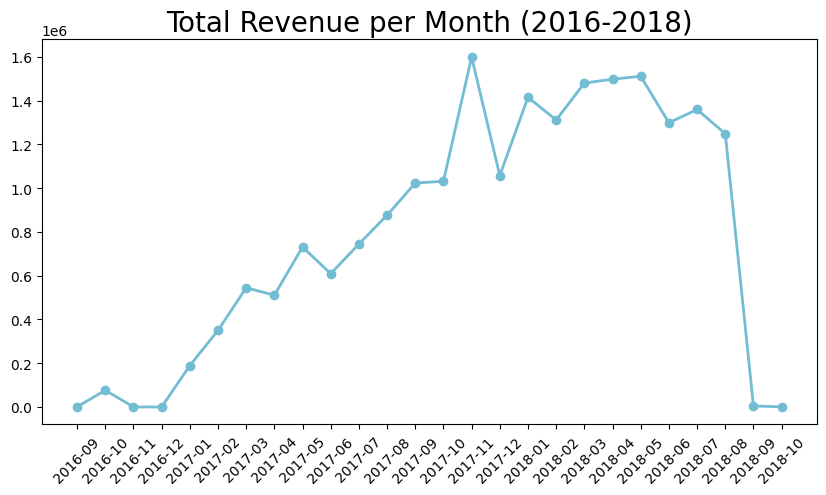

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["date"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

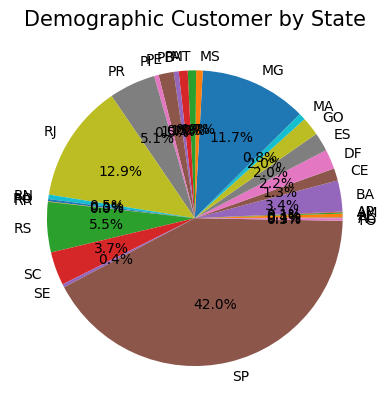

In [ ]:
order_cust=order_cust.groupby(by="customer_state")["order_id"].count().reset_index()
plt.pie(
    x=order_cust["order_id"],
    labels=order_cust["customer_state"],
    autopct='%1.1f%%',
)
plt.title("Demographic Customer by State", loc="center", fontsize=15)
plt.show()